In [1]:
import os
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd

loss_columns = ['cycle_loss', 'discriminator_loss', 'generator_loss']

def walk_dir(root_dir):
    data = {}
    for file in sorted(os.listdir(root_dir)):
        filepath = os.path.join(root_dir, file)
        if os.path.isfile(filepath):
            data[file] = pickle.load(open(filepath, 'rb'))
    return data

def plot_params(data, titles, savefile='', loss_columns=loss_columns):
    data_list = list(data.values())
    num_params = len(data_list) // 3
    nrows = math.ceil(num_params / 2)
    fig, axes = plt.subplots(nrows, 2, figsize=(20, 5*nrows))
    for i in range(num_params):
        ax = axes[i//2, i%2]
        ax.set(title=titles[i], ylabel='loss', xlabel='epochs')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(140))
        set_labels = ax.set_xticklabels([i for i in range(-1, 6)])    
        for j in range(3):
            ax.plot(data_list[num_params*j+i])
        fig.legend(loss_columns)
    if num_params % 2 > 0:
        axes[-1, -1].axis('off')
    if savefile:
        fig.savefig(savefile)
    fig.tight_layout(pad=3)

def show_latest_loss(data, titles, loss_columns=loss_columns):
    df = pd.DataFrame(index=titles, columns=loss_columns)
    data_list = list(data.values())
    for i, col in enumerate(loss_columns):
        start = i * len(titles)
        end = (i+1) * len(titles)
        df.loc[:, col] = [loss[-1].numpy() for loss in data_list[start:end]]
    return df.sort_values('cycle_loss')

### Learning Rate

In [2]:
lr_data = walk_dir('../input/newdataset/lr-test')
lr_data.keys()

dict_keys(['c_loss_lr_1e-1.pkl', 'c_loss_lr_1e-2.pkl', 'c_loss_lr_1e-3.pkl', 'c_loss_lr_1e-4.pkl', 'c_loss_lr_1e-5.pkl', 'd_loss_lr_1e-1.pkl', 'd_loss_lr_1e-2.pkl', 'd_loss_lr_1e-3.pkl', 'd_loss_lr_1e-4.pkl', 'd_loss_lr_1e-5.pkl', 'g_loss_lr_1e-1.pkl', 'g_loss_lr_1e-2.pkl', 'g_loss_lr_1e-3.pkl', 'g_loss_lr_1e-4.pkl', 'g_loss_lr_1e-5.pkl'])

,cycle_loss,discriminator_loss,generator_loss
1e-3,1.058306,0.375865,2.585566
1e-4,1.083940,0.307045,2.148097
1e-1,1.177804,0.504623,2.267165
1e-5,1.230125,0.600921,2.178170
1e-2,1.273723,0.468004,2.303362


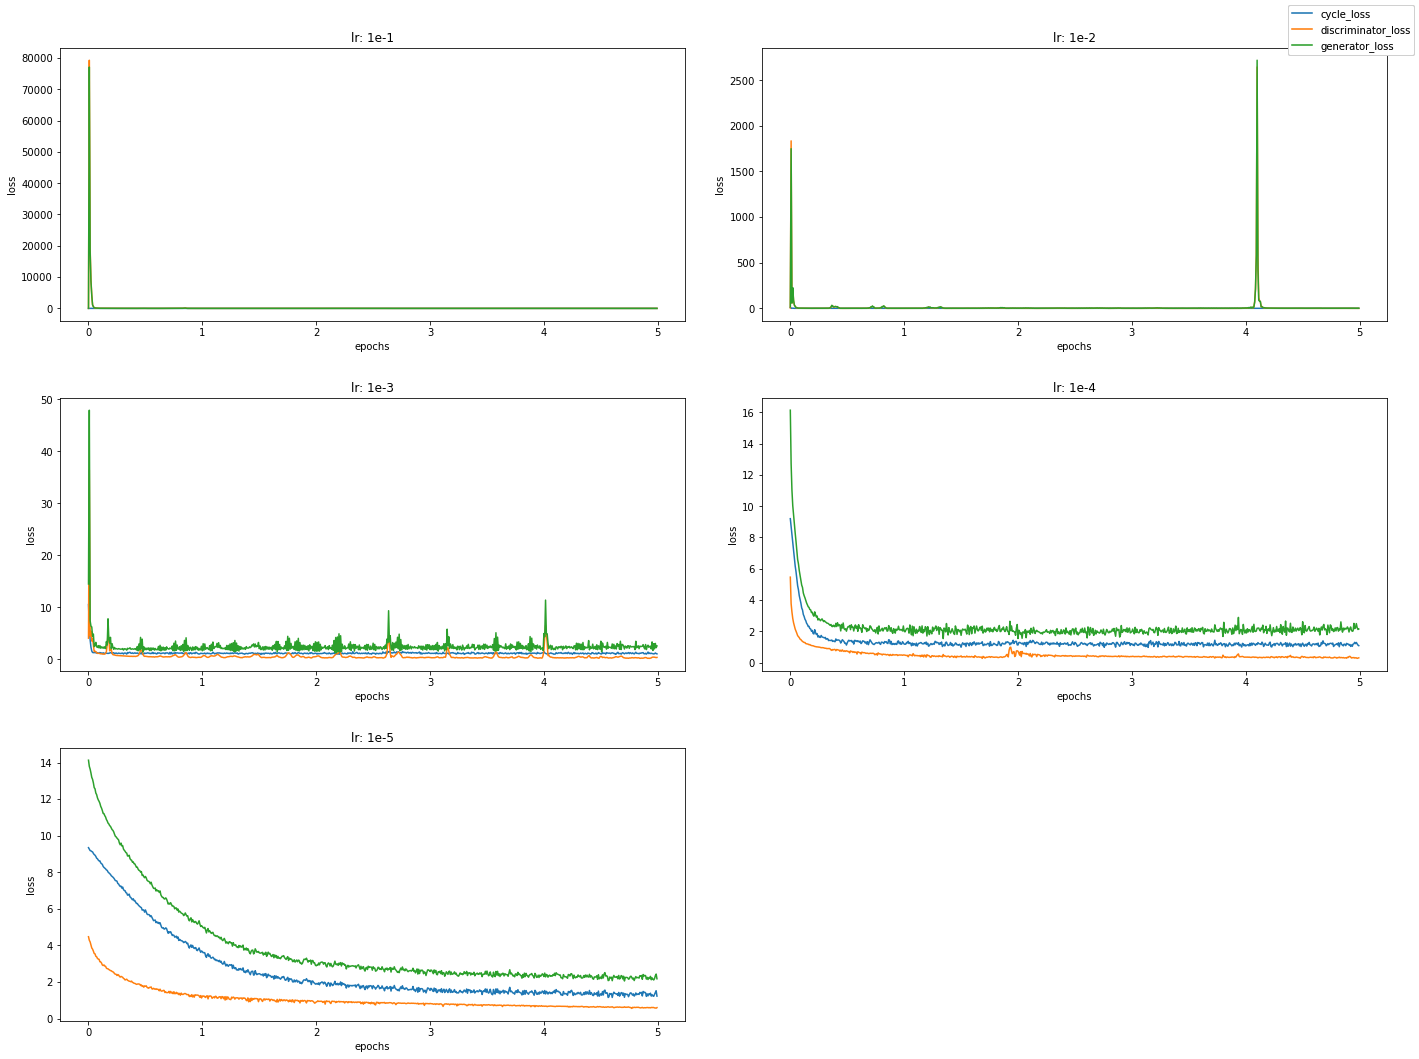

In [3]:
lr_titles = ['1e-1', '1e-2', '1e-3', '1e-4', '1e-5']
plot_params(lr_data, titles=[f"lr: {x}" for x in lr_titles], savefile='lr.png')
show_latest_loss(lr_data, titles=lr_titles)

### Std Dev of Gaussian Noise (sigma_d)

In [4]:
sigma_data = walk_dir('../input/newdataset/sigma-test')
sigma_data.keys()

dict_keys(['c_loss_sigma_0.pkl', 'c_loss_sigma_1.pkl', 'c_loss_sigma_1e-1.pkl', 'c_loss_sigma_1e-2.pkl', 'c_loss_sigma_3.pkl', 'd_loss_sigma_0.pkl', 'd_loss_sigma_1.pkl', 'd_loss_sigma_1e-1.pkl', 'd_loss_sigma_1e-2.pkl', 'd_loss_sigma_3.pkl', 'g_loss_sigma_0.pkl', 'g_loss_sigma_1.pkl', 'g_loss_sigma_1e-1.pkl', 'g_loss_sigma_1e-2.pkl', 'g_loss_sigma_3.pkl'])

,cycle_loss,discriminator_loss,generator_loss
1,1.082776,0.293712,2.474531
3,1.227739,0.449498,1.777592
0.01,1.327743,0.218965,2.877969
0,1.341913,0.304987,2.115739
0.1,1.356122,0.295192,2.304530


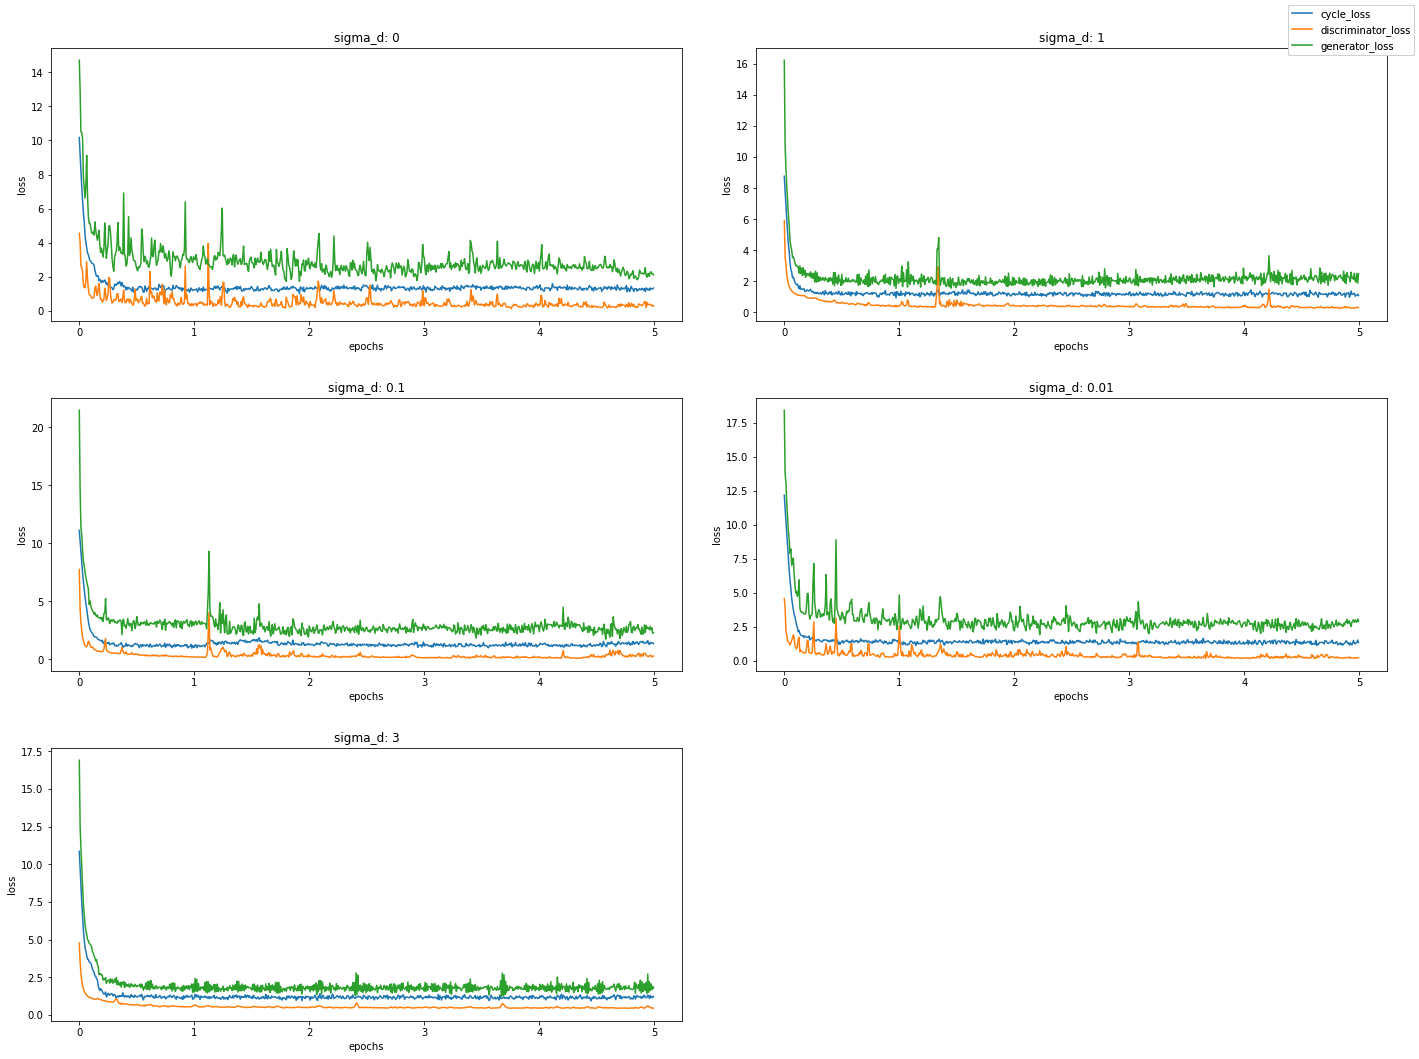

In [5]:
sigma_titles = ['0', '1', '0.1', '0.01', '3']
plot_params(sigma_data, titles=[f"sigma_d: {x}" for x in sigma_titles], savefile='sigma.png')
show_latest_loss(sigma_data, titles=sigma_titles)

### Number of Filters in Generator and Discriminator Conv Layers

In [6]:
filters_data = walk_dir('../input/newdataset/numfilters-test')
filters_data.keys()

dict_keys(['c_loss_filters_128.pkl', 'c_loss_filters_16.pkl', 'c_loss_filters_32.pkl', 'c_loss_filters_64.pkl', 'd_loss_filters_128.pkl', 'd_loss_filters_16.pkl', 'd_loss_filters_32.pkl', 'd_loss_filters_64.pkl', 'g_loss_filters_128.pkl', 'g_loss_filters_16.pkl', 'g_loss_filters_32.pkl', 'g_loss_filters_64.pkl'])

,cycle_loss,discriminator_loss,generator_loss
32,1.137675,0.266394,2.089875
64,1.163105,0.258200,2.262383
128,1.246199,0.339698,2.051824
16,1.268420,0.269932,2.143213


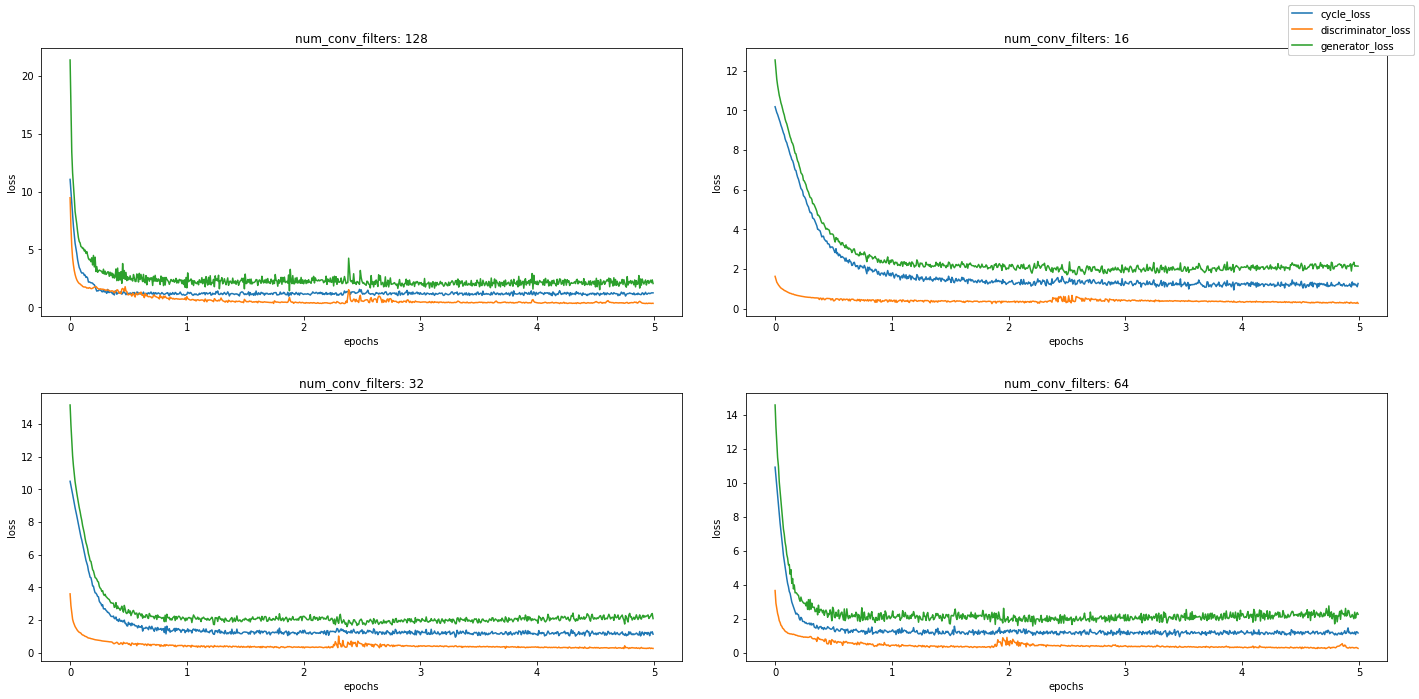

In [7]:
filters_titles = ['128', '16', '32', '64']
plot_params(filters_data, titles=[f"num_conv_filters: {x}" for x in filters_titles], savefile='filters.png')
show_latest_loss(filters_data, titles=filters_titles)

### Choice of Optimizer

In [8]:
optimizer_data = walk_dir("../input/newdataset/optimizer-test")
optimizer_data.keys()

dict_keys(['c_loss_adam.pkl', 'c_loss_rmsprop.pkl', 'c_loss_sgd.pkl', 'd_loss_adam.pkl', 'd_loss_rmsprop.pkl', 'd_loss_sgd.pkl', 'g_loss_adam.pkl', 'g_loss_rmsprop.pkl', 'g_loss_sgd.pkl'])

,cycle_loss,discriminator_loss,generator_loss
RMSprop,1.033560,0.214793,2.554707
Adam,1.279757,0.285112,2.222384
SGD,1.359075,0.909068,2.364186


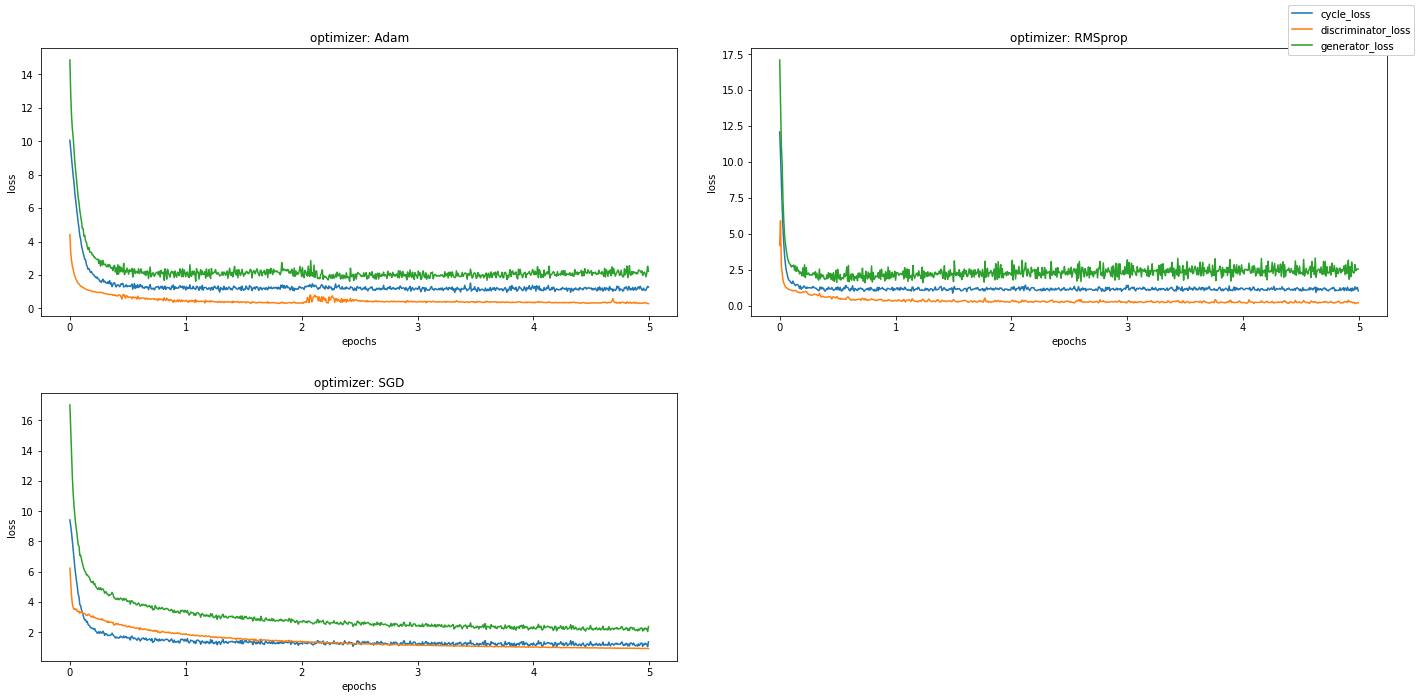

In [9]:
optimizer_titles = ['Adam', 'RMSprop', 'SGD']
plot_params(optimizer_data, titles=[f"optimizer: {x}" for x in optimizer_titles], savefile='optimizer.png')
show_latest_loss(optimizer_data, titles=optimizer_titles)

### Momentum Term

In [10]:
momentum_data = walk_dir("../input/newdataset/momentum-test")
momentum_data.keys()

dict_keys(['c_loss_beta_0.2.pkl', 'c_loss_beta_0.5.pkl', 'c_loss_beta_0.8.pkl', 'c_loss_beta_0.99.pkl', 'c_loss_beta_0.pkl', 'd_loss_beta_0.2.pkl', 'd_loss_beta_0.5.pkl', 'd_loss_beta_0.8.pkl', 'd_loss_beta_0.99.pkl', 'd_loss_beta_0.pkl', 'g_loss_beta_0.2.pkl', 'g_loss_beta_0.5.pkl', 'g_loss_beta_0.8.pkl', 'g_loss_beta_0.99.pkl', 'g_loss_beta_0.pkl'])

,cycle_loss,discriminator_loss,generator_loss
0.99,0.958800,0.302688,2.128639
0.8,1.068728,0.340920,2.006742
0.5,1.132238,0.297926,2.123536
0.2,1.191028,0.425589,1.878355
0,1.418876,0.406390,1.989843


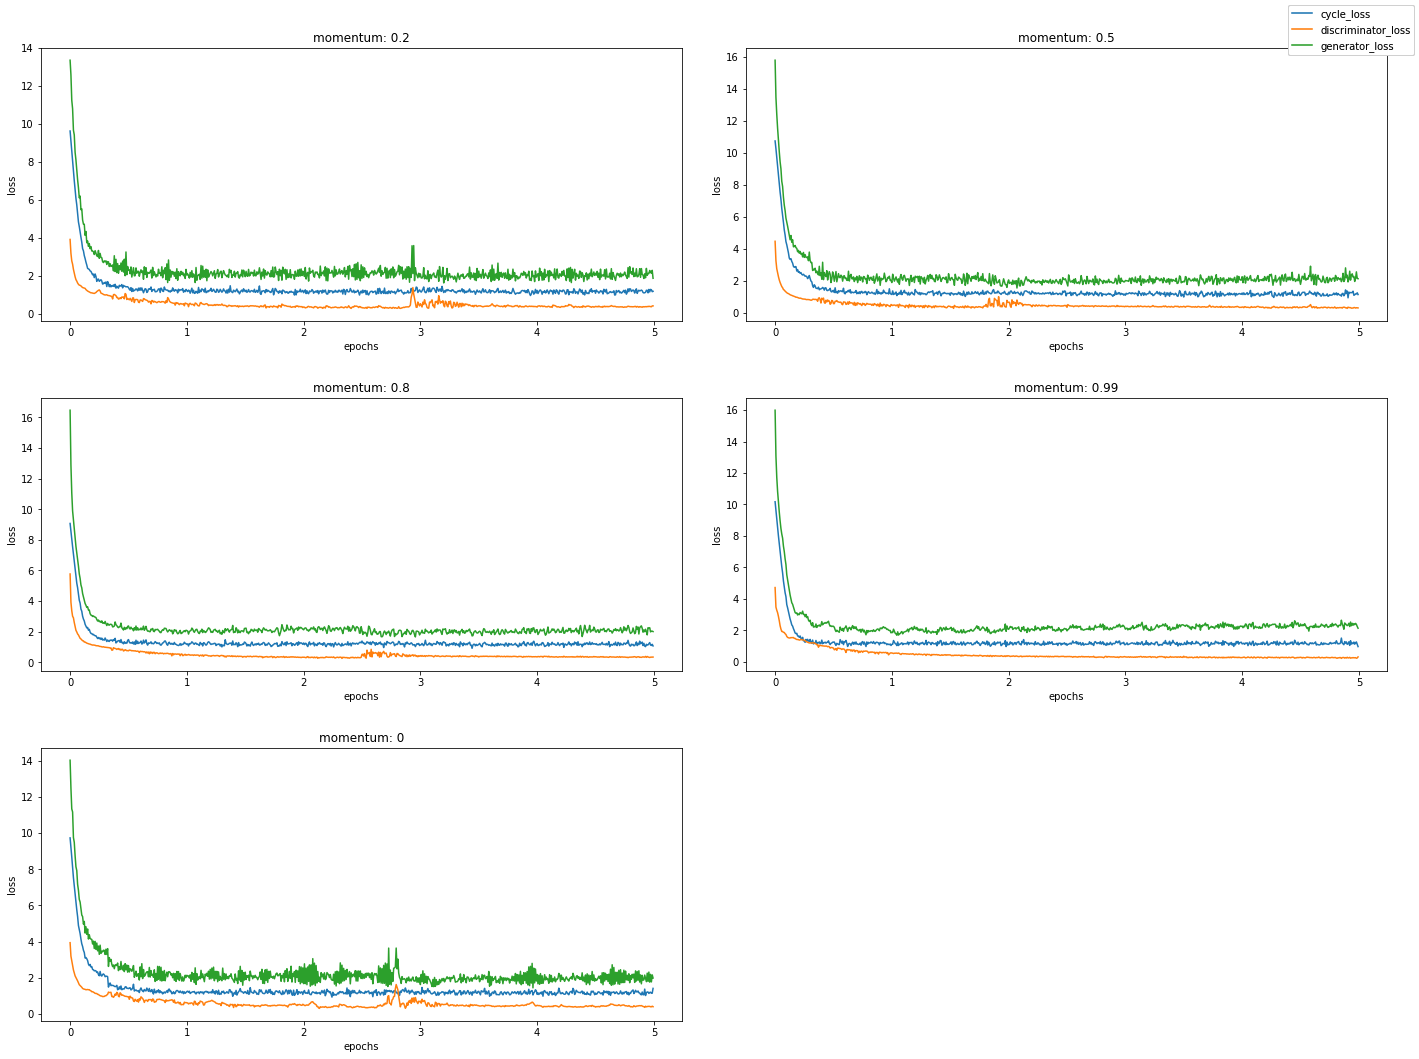

In [11]:
momentum_titles = ['0.2', '0.5', '0.8', '0.99', '0']
plot_params(momentum_data, titles=[f"momentum: {x}" for x in momentum_titles], savefile='momentum.png')
show_latest_loss(momentum_data, titles=momentum_titles)